In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn as sns
from lxml import html
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [4]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.235308005623429,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156144797153617,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98963876392942,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather Part II], ...",8.984023303780534,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951110946877296,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Everything Everywhere ...",8.00579345248082,"Dan Kwan (dir.), Michelle Yeoh, Stephanie Hsu",/title/tt6710474/
246,"[\n 247.\n , [De IJzeren reus], \n, ...",8.00514336968401,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.005015334315667,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Aladdin], \n, [(1992)]...",8.004994741224463,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [5]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [6]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [7]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [8]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235308005623429,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156144797153617,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98963876392942,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.984023303780534,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951110946877296,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957


In [9]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with.

Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:9.2 based on 2,554,919 user ratings. Из этого текста нужно достать = 2,554,919. Подсказка: используя метод find_all с аргументом attrs в который нужно передать {'class': 'ratingColumn imdbRating'} от страници http://www.imdb.com/chart/top. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.

Задача 9. Постройте топ 10 слов, которые встречаются
в названии фильмов
в описании фильмов
в названии и в описании фильмов

Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для The Godfather ожидается получить список из Crime, Drama. (Можно увидеть эти теги по картинкой к фильму)

In [60]:
#Задача_1
def crew_lst(text):
    data = text.split(", ")
    for i in range(len(data)):
        data[i] = data[i].replace('(dir.)', '').strip()
    return data

In [63]:
data['crew_list'] = data.crew.apply(crewlst)
data.head()

,movies,ratings,crew,links,title,year,crew_list,director,description,description_actors,rate_count,tags
0,"[\n 1.\n , [The Shawshank Redemption...",9.235308,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont,The Shawshank Redemption: Directed by Frank Da...,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2672627,[Drama]
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156145,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...,"[Marlon Brando, Al Pacino, James Caan, Richard S]",1852272,"[Crime, Drama]"
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989639,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2645508,"[Action, Crime, Drama]"
3,"[\n 4.\n , [The Godfather Part II], ...",8.984023,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola,The Godfather Part II: Directed by Francis For...,"[Al Pacino, Robert Duvall, Diane Keaton, Rober...",1268252,"[Crime, Drama]"
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951111,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet,De 12 gezworenen: Directed by Sidney Lumet. Wi...,"[Martin Balsam, John Fiedler, Lee J]",789395,"[Crime, Drama]"


In [64]:
all_crew_lst = list(set(data['crew_list'].sum()))

In [65]:
len(all_crew_lst)

527

In [16]:
#Задача_2
def dir_lst(text):
    data = text.split(", ")
    dir_name = ''
    for i in range(len(data)):
        if data[i].find('(dir.)') != -1:
            dir_name = data[i].replace('(dir.)', '').strip()
    return dir_name

In [17]:
data['director'] = data.crew.apply(dir_lst)
data.head()

,movies,ratings,crew,links,title,year,crew_list,director
0,"[\n 1.\n , [The Shawshank Redemption...",9.235308005623429,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156144797153617,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98963876392942,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan
3,"[\n 4.\n , [The Godfather Part II], ...",8.984023303780534,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951110946877296,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet


In [19]:
all_dir_lst = list(set(data.director.values))
len(all_dir_lst)

154

In [20]:
#Сколько фильмов у каждого режиссёра
dir_top = data[['director']].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


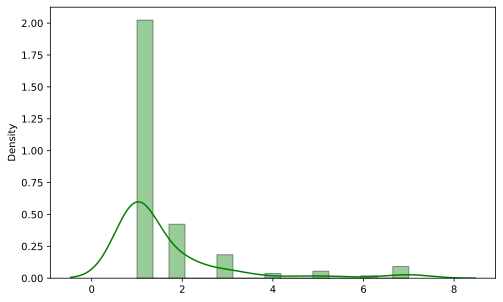

In [22]:
#График
sns.distplot(dir_top, hist=True, kde=True, 
             color = 'green', 
             hist_kws={'edgecolor':'black'}
            )
plt.show()

In [23]:
#Режиссёры в топе
dir_top = dir_top[dir_top.values == dir_top.max()]
dir_top

director         
Martin Scorsese      7
Steven Spielberg     7
Christopher Nolan    7
Stanley Kubrick      7
Akira Kurosawa       7
dtype: int64

In [25]:
#Задача_3
crew_top = pd.DataFrame(all_crew_lst, columns=['names'])
crew_top['film_count'] = crew_top.names.apply(lambda name: data.crew_list.apply(lambda crew: name in crew).value_counts().loc[True])
crew_top.head()

,names,film_count
0,Jodie Foster,2
1,Tom McCarthy,1
2,Laurence Olivier,1
3,Chris Hemsworth,2
4,Noriko Hidaka,1


In [26]:
#У кого большее число фильмов в топе
crew_top[crew_top['film_count'] == crew_top.film_count.max()]

,names,film_count
99,Robert De Niro,9


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


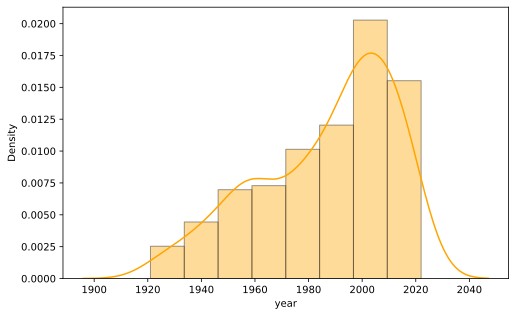

In [30]:
#Задача_4
sns.distplot(data['year'], hist=True, kde=True, 
             color = 'orange', 
             hist_kws={'edgecolor':'black'}
            )
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


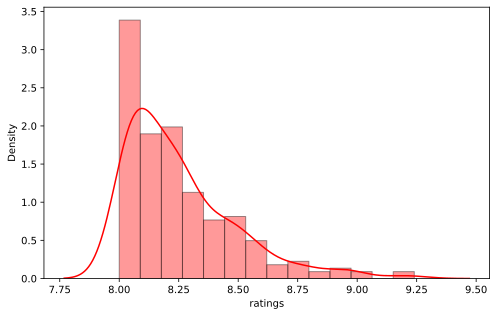

In [41]:
#Задача_5

##Сначала перевела рейтинг во флоаты

data['ratings'] = data['ratings'].astype(float)

##График сотых
sns.distplot(data['ratings'].round(2), hist=True, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'}
            )
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


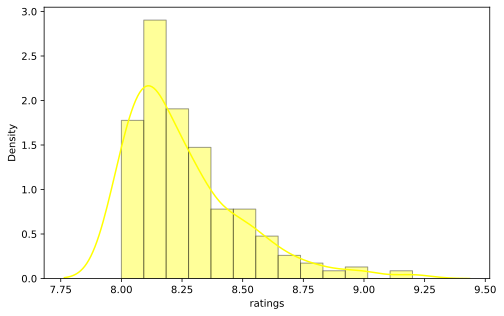

In [43]:
##График десятых

sns.distplot(data['ratings'].round(1), hist=True, kde=True, 
             color = 'yellow', 
             hist_kws={'edgecolor':'black'}
            )
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


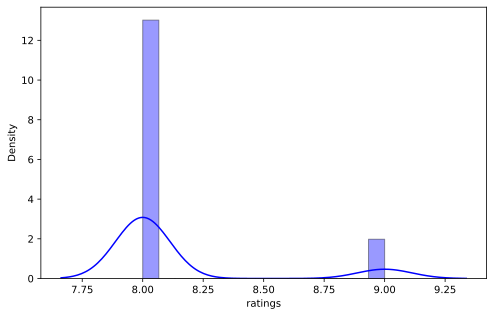

In [45]:
##График целых

sns.distplot(data['ratings'].round(0), hist=True, kde=True, 
             color = 'blue', 
             hist_kws={'edgecolor':'black'}
            )
plt.show()

In [32]:
#Задача_6
pip install fake_useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.9 MB/s 


In [35]:
from fake_useragent import UserAgent
import random
from tqdm import tqdm

In [34]:
film_url = 'https://www.imdb.com/title/tt0111161/'
html_text = requests.get(film_url, headers={'User-Agent': UserAgent().chrome}).text

In [36]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

'The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'

In [37]:
descriptions = []
for film_page in tqdm((data['links']).values):
    film_url = 'https://www.imdb.com' + film_page
    html_text = requests.get(film_url, headers={'User-Agent': UserAgent().chrome}).text
    soup = BeautifulSoup(html_text, 'lxml')
    descriptions.append(soup.find_all(attrs={"name": "description"})[0].get("content"))
    time.sleep(0.5 + random.random())

100%|██████████| 250/250 [10:14<00:00,  2.46s/it]


In [46]:
data['description'] = descriptions
data.head()

,movies,ratings,crew,links,title,year,crew_list,director,description
0,"[\n 1.\n , [The Shawshank Redemption...",9.235308,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont,The Shawshank Redemption: Directed by Frank Da...
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156145,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989639,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...
3,"[\n 4.\n , [The Godfather Part II], ...",8.984023,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola,The Godfather Part II: Directed by Francis For...
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951111,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet,De 12 gezworenen: Directed by Sidney Lumet. Wi...


In [38]:
#Задача_7
import re

In [47]:
data['description_actors']  = data['description'].apply(lambda text: re.findall('With (.*?)\.', text)[0].split(', ')) 
data.head(5)

,movies,ratings,crew,links,title,year,crew_list,director,description,description_actors
0,"[\n 1.\n , [The Shawshank Redemption...",9.235308,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont,The Shawshank Redemption: Directed by Frank Da...,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156145,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...,"[Marlon Brando, Al Pacino, James Caan, Richard S]"
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989639,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,"[\n 4.\n , [The Godfather Part II], ...",8.984023,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola,The Godfather Part II: Directed by Francis For...,"[Al Pacino, Robert Duvall, Diane Keaton, Rober..."
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951111,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet,De 12 gezworenen: Directed by Sidney Lumet. Wi...,"[Martin Balsam, John Fiedler, Lee J]"


In [48]:
#Количество строк с актёрским составом
data['description_actors'].apply(lambda x: x != []).sum()

250

In [49]:
#Задача_8
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [50]:
data['rate_count'] = [int(re.search('on (.*?) user', rate_line.find('strong').attrs.get('title'))[0][3:-5].replace(',', '')) for rate_line in soup.find_all('td', {'class': 'ratingColumn imdbRating'})]
data.head(5)

,movies,ratings,crew,links,title,year,crew_list,director,description,description_actors,rate_count
0,"[\n 1.\n , [The Shawshank Redemption...",9.235308,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont,The Shawshank Redemption: Directed by Frank Da...,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2672627
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156145,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...,"[Marlon Brando, Al Pacino, James Caan, Richard S]",1852272
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989639,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2645508
3,"[\n 4.\n , [The Godfather Part II], ...",8.984023,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola,The Godfather Part II: Directed by Francis For...,"[Al Pacino, Robert Duvall, Diane Keaton, Rober...",1268252
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951111,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet,De 12 gezworenen: Directed by Sidney Lumet. Wi...,"[Martin Balsam, John Fiedler, Lee J]",789395


In [51]:
#Топ по числу оценок
data.sort_values('rate_count', ascending=False)[['title', 'rate_count']].iloc[:10]

,title,rate_count
0,The Shawshank Redemption,2672627
2,The Dark Knight,2645508
13,Inception,2345025
11,Fight Club,2118090
10,Forrest Gump,2072502
7,Pulp Fiction,2047681
15,The Matrix,1908923
8,The Lord of the Rings: The Fellowship of the Ring,1871118
1,The Godfather,1852272
6,The Lord of the Rings: The Return of the King,1841871


In [52]:
#Задача_9
marks = r'[\'\"!\(\)-\[\]\{\};\?@#$%:\,\./\^\&\;\*_]'
df = pd.DataFrame()
df['title_word_list'] = data['title'].apply(lambda line: [item for item in list(map(lambda word: re.sub(marks, '', word), line.split())) if item != ''])
df['description_word_list'] = data['description'].apply(lambda line: [item for item in list(map(lambda word: re.sub(marks, '', word), line.split())) if item != ''])
df

,title_word_list,description_word_list
0,"[he, hawshank, edemption]","[he, hawshank, edemption, irected, by, rank, a..."
1,"[he, odfather]","[he, odfather, irected, by, rancis, ord, oppol..."
2,"[he, ark, night]","[he, ark, night, irected, by, hristopher, olan..."
3,"[he, odfather, art]","[he, odfather, art, irected, by, rancis, ord, ..."
4,"[e, gezworenen]","[e, gezworenen, irected, by, idney, umet, ith,..."
...,...,...
245,"[verything, verywhere, ll, at, nce]","[verything, verywhere, ll, at, nce, irected, b..."
246,"[e, zeren, reus]","[e, zeren, reus, irected, by, rad, ird, ith, e..."
247,"[he, elp]","[he, elp, irected, by, ate, aylor, ith, mma, t..."
248,[laddin],"[laddin, irected, by, on, lements, ohn, usker,..."


In [54]:
def count_my_words(lines):
    answer_dict = dict()
    for line in lines:
        for word in line:
            answer_dict[word] = answer_dict.get(word, 0) + 1
    return answer_dict

In [55]:
#Топ 10 слов в названии фильмов
sorted(list(count_my_words(task9_df['title_word_list'].values).items()),key=lambda x: x[1], reverse=True)[:10]

[('he', 47),
 ('the', 29),
 ('of', 20),
 ('e', 13),
 ('and', 10),
 ('a', 9),
 ('de', 8),
 ('et', 6),
 ('in', 5),
 ('for', 5)]

In [56]:
#Топ 10 слов в описании фильмов
sorted(list(count_my_words(task9_df['description_word_list'].values).items()),key=lambda x: x[1], reverse=True)[:10]

[('the', 359),
 ('a', 320),
 ('by', 295),
 ('ith', 255),
 ('irected', 250),
 ('to', 233),
 ('of', 225),
 ('and', 188),
 ('his', 142),
 ('in', 131)]

In [57]:
#Топ 10 слов описание + название фильмов
sorted(list(count_my_words((task9_df['title_word_list'] + task9_df['description_word_list']).values).items()),key=lambda x: x[1], reverse=True)[:10]

[('the', 388),
 ('a', 329),
 ('by', 297),
 ('ith', 255),
 ('irected', 250),
 ('of', 245),
 ('to', 236),
 ('and', 198),
 ('he', 164),
 ('his', 142)]

In [59]:
#Задача_10

tags = []
for film_page in tqdm((data['links']).values):
    film_url = 'https://www.imdb.com' + film_page
    html_text = requests.get(film_url, headers={'User-Agent': UserAgent().chrome}).text
    soup = BeautifulSoup(html_text, 'lxml')
    tags.append([teg.text for teg in soup.find_all(attrs={"class": "sc-16ede01-3 bYNgQ ipc-chip ipc-chip--on-baseAlt"})])
    #приостанавливаем запросы на сервер
    time.sleep(0.5 + random.random())

100%|██████████| 250/250 [10:32<00:00,  2.53s/it]


In [61]:
data['tags'] = tags
data.head()

,movies,ratings,crew,links,title,year,crew_list,director,description,description_actors,rate_count,tags
0,"[\n 1.\n , [The Shawshank Redemption...",9.235308,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont,The Shawshank Redemption: Directed by Frank Da...,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2672627,[Drama]
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156145,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...,"[Marlon Brando, Al Pacino, James Caan, Richard S]",1852272,"[Crime, Drama]"
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989639,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2645508,"[Action, Crime, Drama]"
3,"[\n 4.\n , [The Godfather Part II], ...",8.984023,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola,The Godfather Part II: Directed by Francis For...,"[Al Pacino, Robert Duvall, Diane Keaton, Rober...",1268252,"[Crime, Drama]"
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951111,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet,De 12 gezworenen: Directed by Sidney Lumet. Wi...,"[Martin Balsam, John Fiedler, Lee J]",789395,"[Crime, Drama]"


In [62]:
#Список тегов
task10_df = pd.DataFrame(data['tags'].sum(), columns=['tag_name'])
task10_df.value_counts()

tag_name 
Drama        176
Adventure     60
Action        51
Crime         51
Comedy        46
Mystery       31
Thriller      30
Biography     29
Animation     23
War           23
Romance       23
Sci-Fi        20
Fantasy       14
Family        13
History       10
Western        6
Sport          5
Horror         5
Music          4
Film-Noir      4
Musical        1
dtype: int64